# Instrucciones para examen

Objetivo: Este examen tiene como objetivo evaluar la capacidad del estudiante para limpiar, explorar, implementar y evaluar modelos de regresión en un dataset de precios de casas. Utilizaremos el «House Prices Dataset» disponible en Kaggle. Los estudiantes deben demostrar habilidades prácticas en la manipulación de datos, creación de visualizaciones y modelado predictivo.

## Contexto y Descripción del Dataset

El «House Prices Dataset» contiene datos sobre diversas características de casas residenciales en Ames, Iowa. La tarea es predecir el precio final de cada casa (variable objetivo) en función de sus características.

## Requisitos

### Limpieza de Datos:
* Identificación y eliminación de valores duplicados: Asegúrate de que no haya registros duplicados que puedan sesgar los resultados del análisis.
* Verificación y ajuste de tipos de datos: Verifica que cada columna tenga el tipo de dato correcto (numérico o categórico) y ajusta si es necesario.
* Corrección de inconsistencias en valores categóricos: Revisa las categorías de las variables y unifica aquellos valores que puedan estar escritos de diferentes maneras pero que representen lo mismo.
* Manejo de valores faltantes adecuadamente: Identifica y maneja los valores faltantes utilizando técnicas apropiadas como la imputación de la mediana, media o moda, según corresponda.
### Exploración de Datos:
* Visualizaciones univariadas y multivariadas: Crea histogramas, gráficos de barras, diagramas de dispersión y mapas de calor para entender la distribución y las relaciones entre las variables.
* Estadísticas descriptivas: Calcula medidas de tendencia central (media, mediana, moda) y de dispersión (rango, desviación estándar) para cada característica del dataset.
Implementación de Modelos:
* Modelos de Regresión: Implementa modelos de Linear Regression y LightGBM (LGBM).
* Evaluación de Modelos: Evalúa los modelos utilizando métricas como MSE, RMSE, y R^2.
* Comparación de Rendimiento: Compara los resultados de ambos modelos y discute cuál es el más adecuado para este dataset.

## Entrega

Los estudiantes deben entregar un archivo .ipynb comentado que incluya:

  * Proceso completo de limpieza y preprocesamiento de datos.
 * Visualizaciones y estadísticas descriptivas.
 * Implementación y evaluación de los modelos de regresión.
 * Análisis comparativo del rendimiento de los modelos.
 * Además, el archivo debe subirse a GitHub con un tag de liberación (release tag) que permita identificar la entrega final.

## Consideraciones Éticas y Tecnológicas

**Consideraciones Éticas:**

* Transparencia y Reproducibilidad: Asegúrate de que todos los pasos del análisis sean claros y reproducibles. Otros investigadores deben poder seguir tus pasos y llegar a los mismos resultados.
* Imparcialidad y Sesgo: Revisa si existen sesgos en los datos que puedan afectar la imparcialidad del modelo. Es importante que los modelos no discriminen injustamente entre diferentes grupos de datos.

**Consideraciones Tecnológicas:**

* Herramientas Utilizadas: Utiliza herramientas estándar como Python, Jupyter Notebook, Pandas, Scikit-learn, Matplotlib y Seaborn.
* Escalabilidad: Considera cómo las técnicas aplicadas podrían escalarse para manejar conjuntos de datos más grandes y complejos.
* Optimización de Modelos: Aunque este examen no se enfoca en la optimización de hiperparámetros, se debe tener en cuenta para futuras implementaciones y mejorar el rendimiento de los modelos.

In [886]:
# Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression  # Usamos LinearRegression en lugar de LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score




### Limpieza de Datos:
* Identificación y eliminación de valores duplicados: Asegúrate de que no haya registros duplicados que puedan sesgar los resultados del análisis.
* Verificación y ajuste de tipos de datos: Verifica que cada columna tenga el tipo de dato correcto (numérico o categórico) y ajusta si es necesario.
* Corrección de inconsistencias en valores categóricos: Revisa las categorías de las variables y unifica aquellos valores que puedan estar escritos de diferentes maneras pero que representen lo mismo.
* Manejo de valores faltantes adecuadamente: Identifica y maneja los valores faltantes utilizando técnicas apropiadas como la imputación de la mediana, media o moda, según corresponda.


In [887]:
# Cargar el dataset de datos compretos
df_completo=pd.read_csv(r'C:\Users\GIGABYTE\Documents\examen_machine_learning\examen_intento_1\data\datos_completos.csv')
df_completo.head(20)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0
5,6,50,RL,85,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000.0
6,7,20,RL,75,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000.0
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000.0
8,9,50,RM,51,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900.0
9,10,190,RL,50,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000.0


In [888]:
# Cargar los datasets de entrenamiento y prueba
train_df = pd.read_csv(r"C:\Users\GIGABYTE\Documents\examen_machine_learning\examen_intento_1\data\train.csv")
test_df = pd.read_csv(r"C:\Users\GIGABYTE\Documents\examen_machine_learning\examen_intento_1\data\test.csv")

In [889]:
# Verificar las primeras filas y la información de ambos datasets
print("Datos de entrenamiento:")
train_df.head()


Datos de entrenamiento:


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [890]:
print("Datos de prueba:")
test_df.head()

Datos de prueba:


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [891]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [892]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [893]:
# Identificar duplicados
duplicados_train = train_df.duplicated()
duplicados_test = test_df.duplicated()

# Obtener cantidad de duplicados
total_dup_train = duplicados_train.sum()
total_dup_test = duplicados_test.sum()

print(f"Total de registros duplicados en train: {total_dup_train}")
print(f"Total de registros duplicados en test: {total_dup_test}")  # Corregido

# Sumar duplicados de ambos datasets
total_duplicados = total_dup_train + total_dup_test
print(f"Total de registros duplicados: {total_duplicados}")


Total de registros duplicados en train: 0
Total de registros duplicados en test: 0
Total de registros duplicados: 0


In [894]:
from utils import calculate_null
# Valores Nulos para traint
calculate_null(train_df)

,datos sin NAs en q,Na en q,Na en %
PoolQC,7,1453,99.52
MiscFeature,54,1406,96.30
Alley,91,1369,93.77
Fence,281,1179,80.75
MasVnrType,588,872,59.73
...,...,...,...
MoSold,1460,0,0.00
YrSold,1460,0,0.00
SaleType,1460,0,0.00
SaleCondition,1460,0,0.00


In [895]:
# Valores Nulos para test
calculate_null(test_df)

,datos sin NAs en q,Na en q,Na en %
PoolQC,3,1456,99.79
MiscFeature,51,1408,96.50
Alley,107,1352,92.67
Fence,290,1169,80.12
MasVnrType,565,894,61.27
...,...,...,...
EnclosedPorch,1459,0,0.00
MiscVal,1459,0,0.00
MoSold,1459,0,0.00
YrSold,1459,0,0.00


In [896]:
# Filtrar las columnas categóricas
categorical_cols = train_df.select_dtypes(include=['category', 'object']).columns

# Obtener los valores únicos de las columnas categóricas
for col in categorical_cols:
    print(f"Valores únicos en la columna '{col}':")
    print(df_completo[col].unique())
    print()  # Línea en blanco para separar los resultados

Valores únicos en la columna 'MSZoning':
['RL' 'RM' 'C (all)' 'FV' 'RH' 'MSZoning' nan]

Valores únicos en la columna 'Street':
['Pave' 'Grvl' 'Street']

Valores únicos en la columna 'Alley':
[nan 'Grvl' 'Pave' 'Alley']

Valores únicos en la columna 'LotShape':
['Reg' 'IR1' 'IR2' 'IR3' 'LotShape']

Valores únicos en la columna 'LandContour':
['Lvl' 'Bnk' 'Low' 'HLS' 'LandContour']

Valores únicos en la columna 'Utilities':
['AllPub' 'NoSeWa' 'Utilities' nan]

Valores únicos en la columna 'LotConfig':
['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3' 'LotConfig']

Valores únicos en la columna 'LandSlope':
['Gtl' 'Mod' 'Sev' 'LandSlope']

Valores únicos en la columna 'Neighborhood':
['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste' 'Neighborhood']

Valores únicos en la columna 'Condition1':
['Norm' 'Feedr

In [897]:
# Filtrar las columnas categóricas
categorical_cols = test_df.select_dtypes(include=['category', 'object']).columns

# Obtener los valores únicos de las columnas categóricas
for col in categorical_cols:
    print(f"Valores únicos en la columna '{col}':")
    print(df_completo[col].unique())
    print()  # Línea en blanco para separar los resultados

Valores únicos en la columna 'MSZoning':
['RL' 'RM' 'C (all)' 'FV' 'RH' 'MSZoning' nan]

Valores únicos en la columna 'Street':
['Pave' 'Grvl' 'Street']

Valores únicos en la columna 'Alley':
[nan 'Grvl' 'Pave' 'Alley']

Valores únicos en la columna 'LotShape':
['Reg' 'IR1' 'IR2' 'IR3' 'LotShape']

Valores únicos en la columna 'LandContour':
['Lvl' 'Bnk' 'Low' 'HLS' 'LandContour']

Valores únicos en la columna 'Utilities':
['AllPub' 'NoSeWa' 'Utilities' nan]

Valores únicos en la columna 'LotConfig':
['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3' 'LotConfig']

Valores únicos en la columna 'LandSlope':
['Gtl' 'Mod' 'Sev' 'LandSlope']

Valores únicos en la columna 'Neighborhood':
['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste' 'Neighborhood']

Valores únicos en la columna 'Condition1':
['Norm' 'Feedr

In [898]:
# Detectar columnas con valores únicos ['Y', 'N'] (sin importar el orden)
yes_no_columns = [col for col in train_df.columns if set(train_df[col].dropna().unique()) == {'Y', 'N'}]
print("Columnas de train con valores 'Y' y 'N':", yes_no_columns)

# Aplicar el mapeo 'Y' -> 1 y 'N' -> 0 a todas las columnas de una vez usando map
train_df[yes_no_columns] = train_df[yes_no_columns].apply(lambda col: col.map({'Y': 1, 'N': 0}))
print("Valor Cambiado de la columna",yes_no_columns)
print(train_df['CentralAir'].unique())

# Detectar columnas con valores únicos ['Y', 'N'] en el conjunto de test
yes_no_columns_test = [col for col in test_df.columns if set(test_df[col].dropna().unique()) == {'Y', 'N'}]
print("Columnas de test con valores 'Y' y 'N':", yes_no_columns_test)

# Aplicar el mapeo 'Y' -> 1 y 'N' -> 0 a todas las columnas de una vez en el conjunto de test
test_df[yes_no_columns_test] = test_df[yes_no_columns_test].apply(lambda col: col.map({'Y': 1, 'N': 0}))
print("Valor Cambiado de la columna",yes_no_columns_test)
print(test_df['CentralAir'].unique())


Columnas de train con valores 'Y' y 'N': ['CentralAir']
Valor Cambiado de la columna ['CentralAir']
[1 0]
Columnas de test con valores 'Y' y 'N': ['CentralAir']
Valor Cambiado de la columna ['CentralAir']
[1 0]


In [899]:
print(train_df.dtypes)


Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object


### Exploración de Datos:
* Visualizaciones univariadas y multivariadas: Crea histogramas, gráficos de barras, diagramas de dispersión y mapas de calor para entender la distribución y las relaciones entre las variables.
* Estadísticas descriptivas: Calcula medidas de tendencia central (media, mediana, moda) y de dispersión (rango, desviación estándar) para cada característica del dataset.



In [900]:
# Estadísticas descriptivas para el conjunto de entrenamiento (train) y prueba (test)
print("Estadísticas descriptivas para el dataset de entrenamiento:")
train_df.describe().T

Estadísticas descriptivas para el dataset de entrenamiento:


,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [901]:
print("Estadísticas descriptivas para el dataset de prueba:")
test_df.describe().T

Estadísticas descriptivas para el dataset de prueba:


,count,mean,std,min,25%,50%,75%,max
Id,1459.0,2190.000000,421.321334,1461.0,1825.50,2190.0,2554.50,2919.0
MSSubClass,1459.0,57.378341,42.746880,20.0,20.00,50.0,70.00,190.0
LotFrontage,1232.0,68.580357,22.376841,21.0,58.00,67.0,80.00,200.0
LotArea,1459.0,9819.161069,4955.517327,1470.0,7391.00,9399.0,11517.50,56600.0
OverallQual,1459.0,6.078821,1.436812,1.0,5.00,6.0,7.00,10.0
OverallCond,1459.0,5.553804,1.113740,1.0,5.00,5.0,6.00,9.0
YearBuilt,1459.0,1971.357779,30.390071,1879.0,1953.00,1973.0,2001.00,2010.0
YearRemodAdd,1459.0,1983.662783,21.130467,1950.0,1963.00,1992.0,2004.00,2010.0
MasVnrArea,1444.0,100.709141,177.625900,0.0,0.00,0.0,164.00,1290.0
BsmtFinSF1,1458.0,439.203704,455.268042,0.0,0.00,350.5,753.50,4010.0


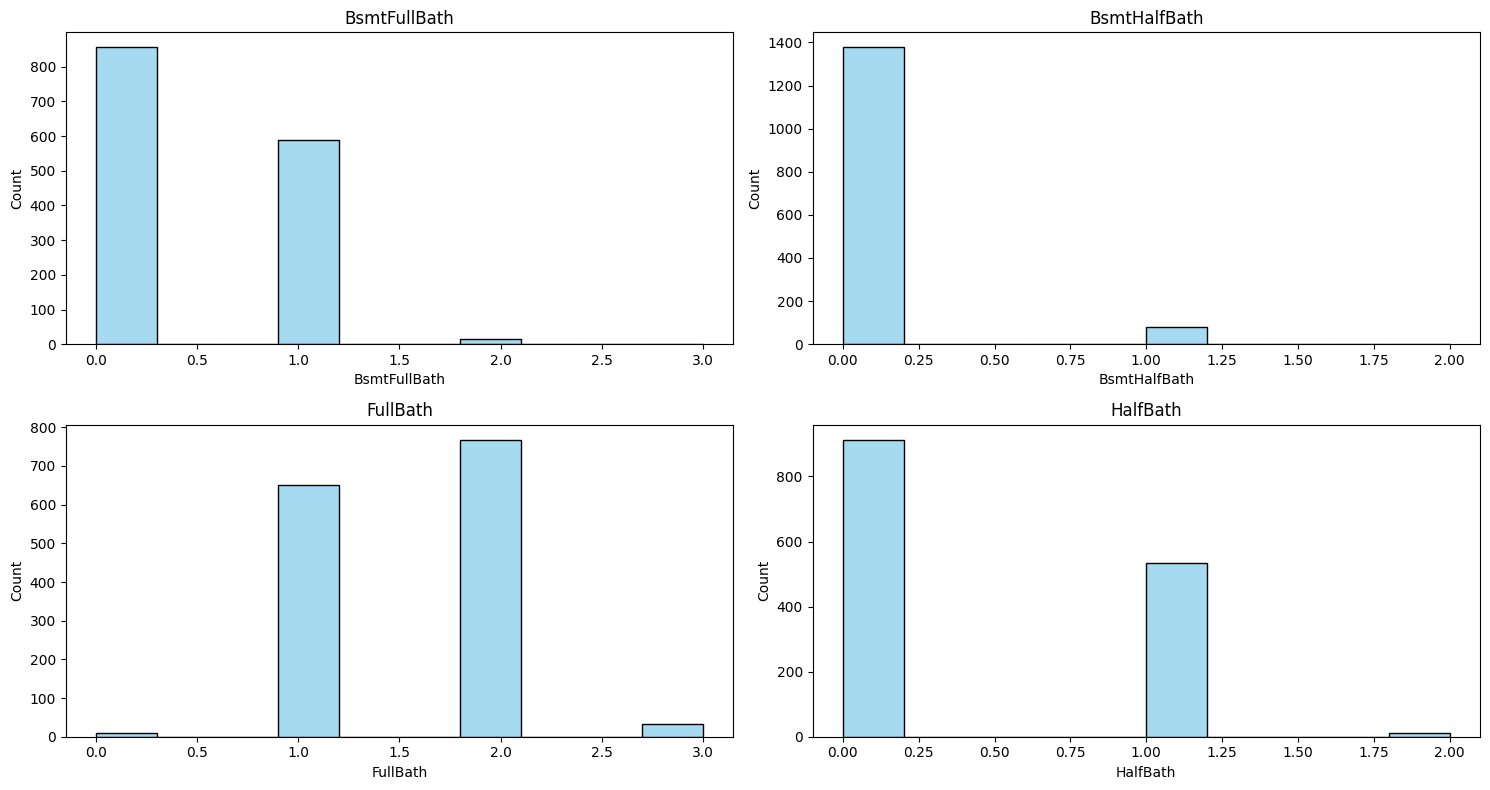

In [902]:
numerical_columns= ['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath'] 
# Crear una figura y una cuadrícula de subplots 2x3
fig, axes = plt.subplots(2, 2, figsize=(15, 8))  # 2 filas y 3 columnas

# Crear un gráfico para cada columna en la cuadrícula de subplots
for i, column in enumerate(numerical_columns):
    row = i // 2  # Fila de la cuadrícula
    col = i % 2   # Columna de la cuadrícula
    sns.histplot(train_df[column], bins=10, ax=axes[row, col], color='skyblue', edgecolor='black')
    axes[row, col].set_title(column)

# Ajustar el diseño para evitar superposiciones
plt.tight_layout()
plt.show()


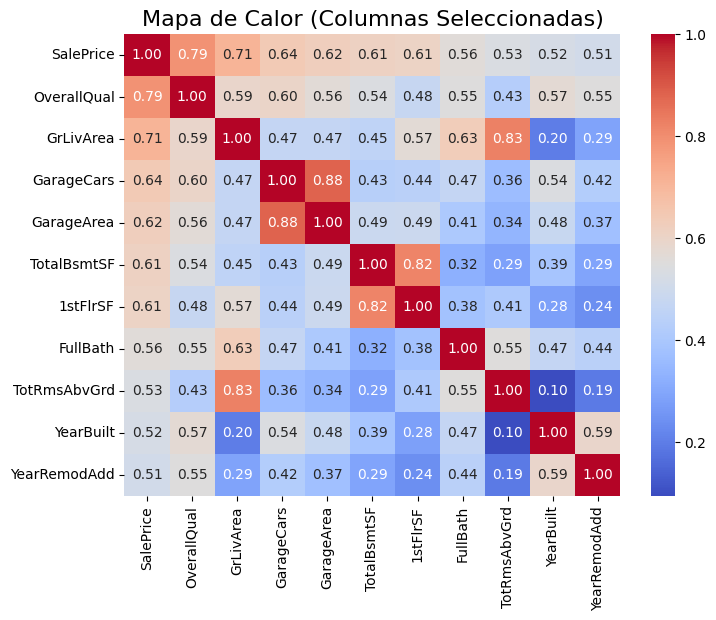

In [903]:
# Seleccionar solo las columnas con correlación mayor a 0.5 (ejemplo)
correlacion_objetivo = correlacion['SalePrice'].sort_values(ascending=False)
columnas_relevantes = correlacion_objetivo[correlacion_objetivo > 0.5].index

# Calcular correlaciones solo para estas columnas
correlacion_reducida = train_df[columnas_relevantes].corr()

# Crear el mapa de calor reducido
plt.figure(figsize=(8, 6))
sns.heatmap(correlacion_reducida, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title('Mapa de Calor (Columnas Seleccionadas)', fontsize=16)
plt.show()


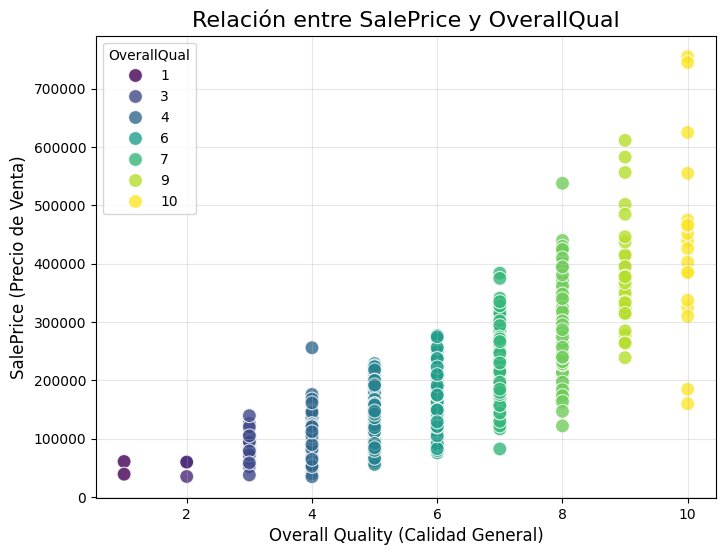

In [904]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=train_df, x='OverallQual', y='SalePrice', hue='OverallQual', palette='viridis', s=100, alpha=0.8)
plt.title('Relación entre SalePrice y OverallQual', fontsize=16)
plt.xlabel('Overall Quality (Calidad General)', fontsize=12)
plt.ylabel('SalePrice (Precio de Venta)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()

### Implementación de Modelos:
* Modelos de Regresión: Implementa modelos de Linear Regression y LightGBM (LGBM).
* Evaluación de Modelos: Evalúa los modelos utilizando métricas como MSE, RMSE, y R^2.
* Comparación de Rendimiento: Compara los resultados de ambos modelos y discute cuál es el más adecuado para este dataset.


In [905]:

# Definir las columnas numéricas y categóricas
numeric_features = train_df.select_dtypes(include=['float64', 'int64']).columns.tolist()
# Excluimos 'SalePrice' (variable objetivo) de las características
numeric_features.remove('SalePrice')

categorical_features = train_df.select_dtypes(include=['object']).columns.tolist()

# Crear transformadores para cada subconjunto de columnas
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Imputar con la media para valores numéricos faltantes
    ('scaler', StandardScaler())  # Escalar las características numéricas
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Imputar con la moda para valores categóricos faltantes
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # Codificar categorías usando OneHot
])

# Crear un ColumnTransformer para aplicar los transformadores
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

# Crear un Pipeline completo con preprocesamiento y regresión
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())  # Usamos LinearRegression para predecir precios de casas
])

# Dividir los datos en conjuntos de entrenamiento y prueba
X = train_df.drop(columns='SalePrice')  # Características (sin la columna objetivo)
y = train_df['SalePrice']  # Variable objetivo

# El conjunto de prueba solo tiene características (sin 'SalePrice')
X_test = test_df  # Solo las características del conjunto de prueba, sin 'SalePrice'

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Ajustar el Pipeline a los datos de entrenamiento
pipeline.fit(X_train, y_train)

# Hacer predicciones utilizando el Pipeline
y_pred = pipeline.predict(X_test)

# Evaluación del modelo
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R^2: {r2:.2f}")

RMSE: 29477.57
R^2: 0.89


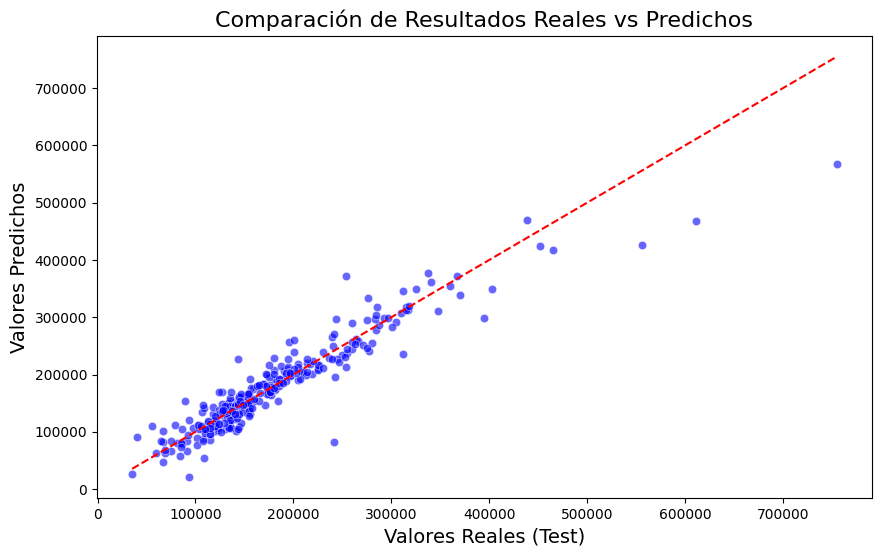

In [906]:
# Crear un gráfico de dispersión de los resultados reales vs los predichos
plt.figure(figsize=(10, 6))  # Se especifica tanto la anchura como la altura
sns.scatterplot(x=y_test, y=y_pred, color='blue', alpha=0.6)

# Graficar una línea de referencia (diagonal) donde los valores reales y predichos sean iguales
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')

# Títulos y etiquetas
plt.title('Comparación de Resultados Reales vs Predichos', fontsize=16)
plt.xlabel('Valores Reales (Test)', fontsize=14)
plt.ylabel('Valores Predichos', fontsize=14)

# Mostrar el gráfico
plt.show()


In [907]:
from sklearn.neighbors import KNeighborsRegressor

# Crear el modelo KNN
knn_model = KNeighborsRegressor(n_neighbors=5)  # Puedes ajustar el valor de k (n_neighbors) si es necesario

# Crear un Pipeline con preprocesamiento y KNN
knn_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Usamos el mismo preprocesador
    ('knn_regressor', knn_model)     # Usamos el modelo KNN
])

# Ajustar el modelo KNN a los datos de entrenamiento
knn_pipeline.fit(X_train, y_train)

# Hacer predicciones con el modelo KNN
y_pred_knn = knn_pipeline.predict(X_test)

# Evaluación del modelo KNN
mse_knn = mean_squared_error(y_test, y_pred_knn)
rmse_knn = np.sqrt(mse_knn)
r2_knn = r2_score(y_test, y_pred_knn)

print(f"KNN - RMSE: {rmse_knn:.2f}")
print(f"KNN - R^2: {r2_knn:.2f}")


KNN - RMSE: 38796.83
KNN - R^2: 0.80


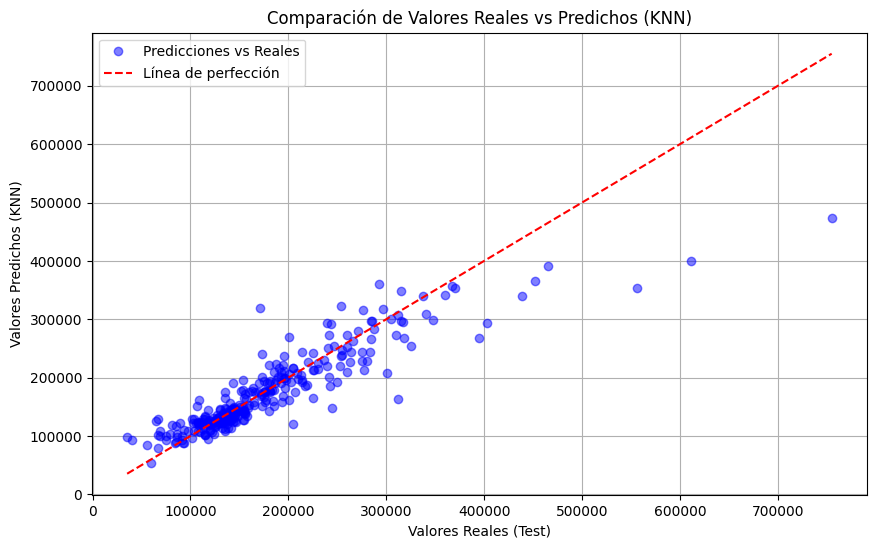

In [908]:
# Graficar los valores reales vs los valores predichos
plt.figure(figsize=(10, 6))
plt.plot(y_test, y_pred_knn, marker='o', color='b', linestyle='None', alpha=0.5, label='Predicciones vs Reales')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Línea de perfección')

# Etiquetas y título
plt.xlabel('Valores Reales (Test)')
plt.ylabel('Valores Predichos (KNN)')
plt.title('Comparación de Valores Reales vs Predichos (KNN)')
plt.legend()

# Mostrar el gráfico
plt.grid(True)
plt.show()


In [909]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Definir el rango de valores para n_neighbors
param_grid = {'knn_regressor__n_neighbors': [3, 5, 7, 9, 11, 15, 20]}

# Crear el objeto GridSearchCV con validación cruzada y scoring de error cuadrático negativo
grid_search = GridSearchCV(knn_pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')

# Ajustar la búsqueda en cuadrícula
grid_search.fit(X_train, y_train)

# Mostrar los mejores parámetros encontrados
print(f"Mejores parámetros: {grid_search.best_params_}")

# Hacer predicciones con el mejor modelo encontrado
y_pred_knn_grid = grid_search.best_estimator_.predict(X_test)

# Evaluar el modelo ajustado
mse_knn_grid = mean_squared_error(y_test, y_pred_knn_grid)
rmse_knn_grid = np.sqrt(mse_knn_grid)
r2_knn_grid = r2_score(y_test, y_pred_knn_grid)

# Mostrar los resultados
print(f"KNN (ajustado) - RMSE: {rmse_knn_grid:.2f}")
print(f"KNN (ajustado) - R^2: {r2_knn_grid:.2f}")


Mejores parámetros: {'knn_regressor__n_neighbors': 11}
KNN (ajustado) - RMSE: 39786.41
KNN (ajustado) - R^2: 0.79


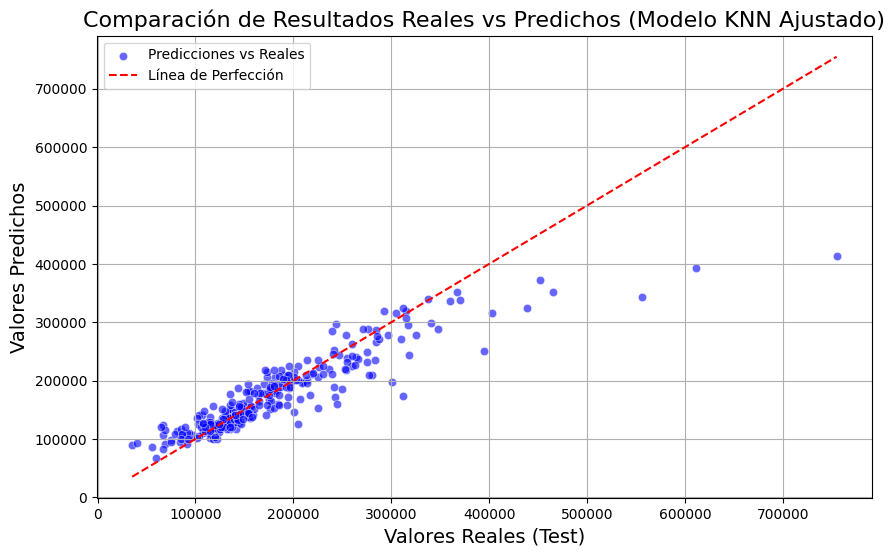

In [910]:
# Crear un gráfico de dispersión de los resultados reales vs los predichos
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_knn_grid, color='blue', alpha=0.6, label='Predicciones vs Reales')

# Graficar una línea de referencia (diagonal) donde los valores reales y predichos sean iguales
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Línea de Perfección')

# Títulos y etiquetas
plt.title('Comparación de Resultados Reales vs Predichos (Modelo KNN Ajustado)', fontsize=16)
plt.xlabel('Valores Reales (Test)', fontsize=14)
plt.ylabel('Valores Predichos', fontsize=14)

# Mostrar la leyenda
plt.legend()

# Mostrar el gráfico
plt.grid(True)
plt.show()